In [3]:
# Install Dash and its dependencies
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.9 MB/s eta 0:00:00


2025-05-26 14:48:38.325 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 14:48:38.460 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-26 14:48:38.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 14:48:38.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 14:48:38.480 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 14:48:38.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 14:48:38.485 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 14:48:38.487 Thread 'MainThread': mi

DeltaGenerator()

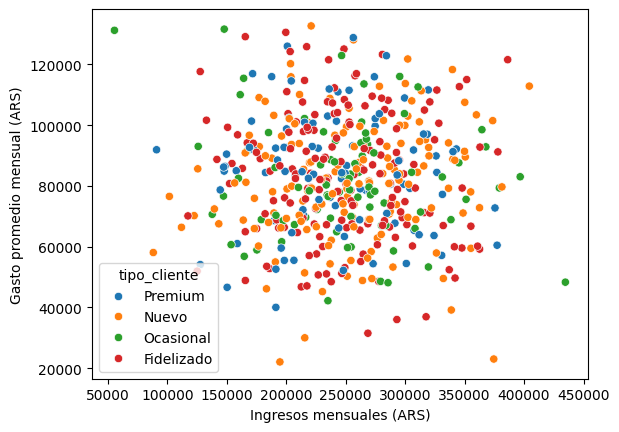

In [4]:
# Streamlit App - Análisis de Clientes
import streamlit as st
streamlit run streamlit_clientes.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.title("Segmentación de Clientes - App con Streamlit")

df = pd.read_csv("clientes.csv")

# Filtros
tipos = st.multiselect("Seleccionar tipo de cliente:", options=df["tipo_cliente"].unique(), default=df["tipo_cliente"].unique())
ingresos = st.slider("Rango de ingresos mensuales (ARS):", int(df["ingresos_mensuales"].min()), int(df["ingresos_mensuales"].max()), (int(df["ingresos_mensuales"].min()), int(df["ingresos_mensuales"].max())))

df_filtrado = df[(df["tipo_cliente"].isin(tipos)) & (df["ingresos_mensuales"].between(*ingresos))]

st.markdown(f"### Total de clientes filtrados: {df_filtrado.shape[0]}")

# KPIs
col1, col2, col3 = st.columns(3)
col1.metric("Edad promedio", round(df_filtrado["edad"].mean(), 1))
col2.metric("Ingreso medio", f"${int(df_filtrado['ingresos_mensuales'].mean()):,}")
col3.metric("Gasto promedio", f"${int(df_filtrado['gasto_promedio_mensual'].mean()):,}")

# Gráfico
st.markdown("### Ingresos vs. Gasto mensual")
fig, ax = plt.subplots()
sns.scatterplot(data=df_filtrado, x="ingresos_mensuales", y="gasto_promedio_mensual", hue="tipo_cliente", ax=ax)
plt.xlabel("Ingresos mensuales (ARS)")
plt.ylabel("Gasto promedio mensual (ARS)")
st.pyplot(fig)
